In [2]:
import matplotlib.pyplot as plt
import missingno as msno
import pandas as pd
import seaborn as sns
import numpy as np
import random

%matplotlib inline
sns.set()

In [3]:
df = pd.read_csv("../data/fr.openfoodfacts.org.products.csv", sep="\t")

/tmp/ipykernel_100795/2821215940.py:1: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/fr.openfoodfacts.org.products.csv", sep="\t")


In [4]:
df.shape

(320772, 162)

In [5]:
df.loc[:, :"image_small_url"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 63 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   code                                        320749 non-null  object 
 1   url                                         320749 non-null  object 
 2   creator                                     320770 non-null  object 
 3   created_t                                   320769 non-null  object 
 4   created_datetime                            320763 non-null  object 
 5   last_modified_t                             320772 non-null  object 
 6   last_modified_datetime                      320772 non-null  object 
 7   product_name                                303010 non-null  object 
 8   generic_name                                52795 non-null   object 
 9   quantity                                    104819 non-null  object 
 

In [6]:
df.sample(10)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
66429,58449155034,http://world-fr.openfoodfacts.org/produit/0058...,usda-ndb-import,1489141286,2017-03-10T10:21:26Z,1489141286,2017-03-10T10:21:26Z,"Envirokidz, Crispy Rice Bars, Chocolate",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN
75353,71262294872,http://world-fr.openfoodfacts.org/produit/0071...,usda-ndb-import,1489068025,2017-03-09T14:00:25Z,1489068026,2017-03-09T14:00:26Z,"Tabatchnick, Split Pea Soup",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-6.0,-6.0,NaN,NaN
299274,7622400723933,http://world-fr.openfoodfacts.org/produit/7622...,openfoodfacts-contributors,1366889788,2013-04-25T11:36:28Z,1490096252,2017-03-21T11:37:32Z,Mini Tablettes,Mini tablettes de chocolat au lait du Pays Alpin,232 g (8 * 29 g e),...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,25.0,NaN,NaN
78301,72036600837,http://world-fr.openfoodfacts.org/produit/0072...,usda-ndb-import,1489060126,2017-03-09T11:48:46Z,1489060126,2017-03-09T11:48:46Z,Cream Cheese With Honey Nut,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,19.0,19.0,NaN,NaN
138533,738985271763,http://world-fr.openfoodfacts.org/produit/0738...,usda-ndb-import,1489065835,2017-03-09T13:23:55Z,1489065835,2017-03-09T13:23:55Z,"Breaded Boneless, Skinless Chicken Breasts",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
249578,3700068140744,http://world-fr.openfoodfacts.org/produit/3700...,tacite,1478971328,2016-11-12T17:22:08Z,1479657835,2016-11-20T16:03:55Z,Queijaria das pousadas,NaN,700 g,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,19.0,NaN,NaN
55162,42400907787,http://world-fr.openfoodfacts.org/produit/0042...,usda-ndb-import,1489063409,2017-03-09T12:43:29Z,1489063409,2017-03-09T12:43:29Z,"Raisin Bran, Whole Wheat & Bran Cereal With Ra...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,11.0,11.0,NaN,NaN
225054,3329224120033,http://world-fr.openfoodfacts.org/produit/3329...,jeanbono,1423818225,2015-02-13T09:03:45Z,1423832838,2015-02-13T13:07:18Z,Les Tartelettes Cerise noire,Tartelettes pur beurre à la cerise noire,150 g,...,NaN,NaN,NaN,NaN,NaN,NaN,22.0,22.0,NaN,NaN
131448,713733340717,http://world-fr.openfoodfacts.org/produit/0713...,usda-ndb-import,1489058330,2017-03-09T11:18:50Z,1489058331,2017-03-09T11:18:51Z,Sourdough Boule,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN
219576,3270160843657,http://world-fr.openfoodfacts.org/produit/3270...,hommedanslalune,1425757024,2015-03-07T19:37:04Z,1425758647,2015-03-07T20:04:07Z,Sorbet Poire sauce Chocolat Picard,Sorbet Poire sauce Chocolat,140 ml,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN


In [7]:
df_gen = df.loc[:, "code":"packaging"]
df_tags = df.loc[:, "packaging":"ingredients_text"]
df_ingredients = df.loc[:, "ingredients_text":"serving_size"]
df_misc = df.loc[:, "serving_size":"energy_100g"]
df_nutrition = df.loc[:, "energy_100g":]

In [8]:
df_gen.sample(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging
123228,669035995202,http://world-fr.openfoodfacts.org/produit/0669...,usda-ndb-import,1489056833,2017-03-09T10:53:53Z,1489056833,2017-03-09T10:53:53Z,Cooked Ham,NaN,NaN,NaN
267220,4607012274274,http://world-fr.openfoodfacts.org/produit/4607...,parukhin,1464023893,2016-05-23T17:18:13Z,1473410172,2016-09-09T08:36:12Z,Йогурт Натуральный с ягодами Вишня Черешня,Йогурт фруктово-ягодный с массовой долей жира ...,450 g,NaN
302325,8002510005003,http://world-fr.openfoodfacts.org/produit/8002...,lukas,1369296220,2013-05-23T08:03:40Z,1487256897,2017-02-16T14:54:57Z,Tomates pelées italiennes,Tomates pelées,"poids net 400g, poids égoutté 280g",Boîte de conserve acier
153599,820213100720,http://world-fr.openfoodfacts.org/produit/0820...,usda-ndb-import,1489137635,2017-03-10T09:20:35Z,1489137636,2017-03-10T09:20:36Z,Horseradish Cream,NaN,NaN,NaN
212705,3257981860131,http://world-fr.openfoodfacts.org/produit/3257...,tacite,1477415715,2016-10-25T17:15:15Z,1478622708,2016-11-08T16:31:48Z,Cola,Boisson gazéifiée aux extraits végétaux,6 * 33 cl,"canette,aluminium,plastique"


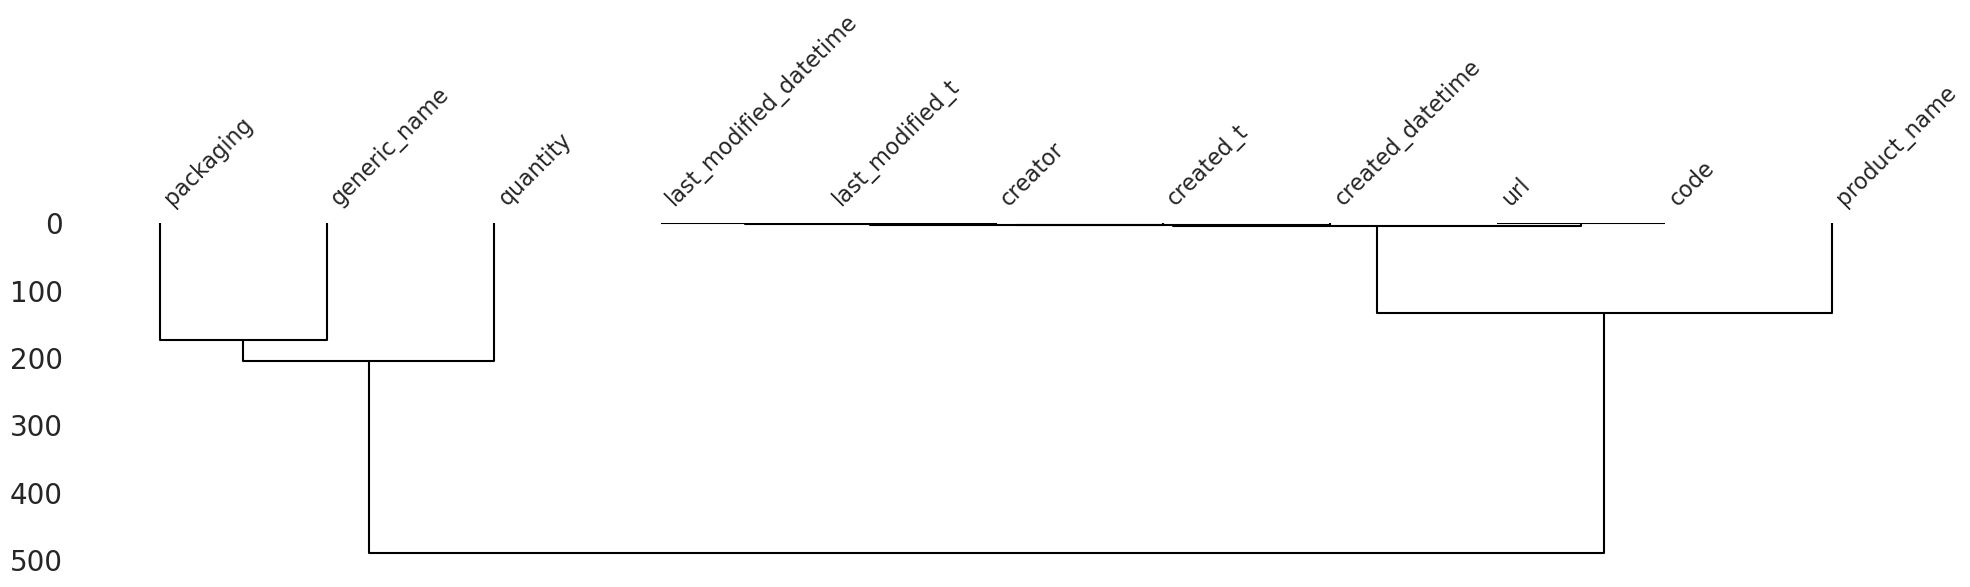

In [9]:
msno.dendrogram(df_gen, figsize=(20, 6))
plt.tight_layout()
plt.show()

In [10]:
df_tags.sample(10)

,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,...,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text
9104,NaN,NaN,Nostimo,nostimo,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Cultured pasteurized skim milk, sugar, mangoes..."
316152,"Brique,Carton,Sig","brique,carton,sig","Knorr,Unilever","knorr,unilever","Aliments et boissons à base de végétaux,Alimen...","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"Vannes,France",Carrefour,France,en:france,France,"Légumes : 57 % (tomate : 54 %, oignon), eau, _..."
75747,NaN,NaN,Advancepierre Foods Inc.,advancepierre-foods-inc,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,Ingredients: sesame seed bun: enriched bleache...
270254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN
301418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Suisse,en:switzerland,Suisse,Aceto Balsamico di Modena IGP 52% (vinaigre de...
113659,"Frais,Barquette,Plastique,Sous atmosphère prot...","frais,barquette,plastique,sous-atmosphere-prot...",Loué,loue,"Frais,Viandes,Produits labellisés,Volailles,Di...","en:fresh-foods,en:meats,en:labeled-products,en...","Frais,Viandes,Produits labellisés,Volailles,Vi...",NaN,NaN,LDC Sablé (Filiale Groupe Lambert Dodard Chanc...,...,fr-72-264-002-ec,"47.833333,-0.333333",NaN,sable-sur-sarthe-sarthe-france,"Toulouse,France",Intermarché,France,en:france,France,Escalopes de dinde.
164206,NaN,NaN,Lily's Sweets,lily-s-sweets,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Unsweetened chocolate, erythritol, inulin, coc..."
238186,Sachet plastique,sachet-plastique,"Carrefour BIO,Carrefour","carrefour-bio,carrefour","Aliments et boissons à base de végétaux,Alimen...","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...","France,Amérique Latine","france,amerique-latine",France,...,emb-85109,"46.866667,-1.016667",NaN,herbiers-vendee-france,NaN,Carrefour,France,en:france,France,"Farine de _blé_* 46%, eau, sucre roux de canne..."
318750,"Cardboard,Plastic","cardboard,plastic",Coles,coles,Christmas Puddings,"en:desserts,en:puddings,en:christmas-puddings","Desserts,Puddings,Puddings de Noël",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"NSW,Australia","Coles,Bilo",Australia,en:australia,Australie,NaN
238732,"Frais,Sachet plastique,Sous-vide","frais,sachet-plastique,sous-vide","Carrefour,CMI (Carrefour Marchandises Internat...","carrefour,cmi-carrefour-marchandises-internati...","Frais,Viandes,Charcuteries,Saucisses,Saucisses...","en:fresh-foods,en:meats,en:prepared-meats,en:s...","Frais,Viandes,Charcuteries,Saucisses,Charcuter...",NaN,NaN,Société Aubret (Filiale Groupe d'aucy) - ZI Ro...,...,"fr-44-180-004-ec,emb-44180c","47.516667,-1.183333",NaN,"saint-mars-la-jaille-loire-atlantique-france,s...","Villers Bocage 80260,France",Carrefour market,France,en:france,France,"Viande de volaille 63 %, eau, gras de volaille..."


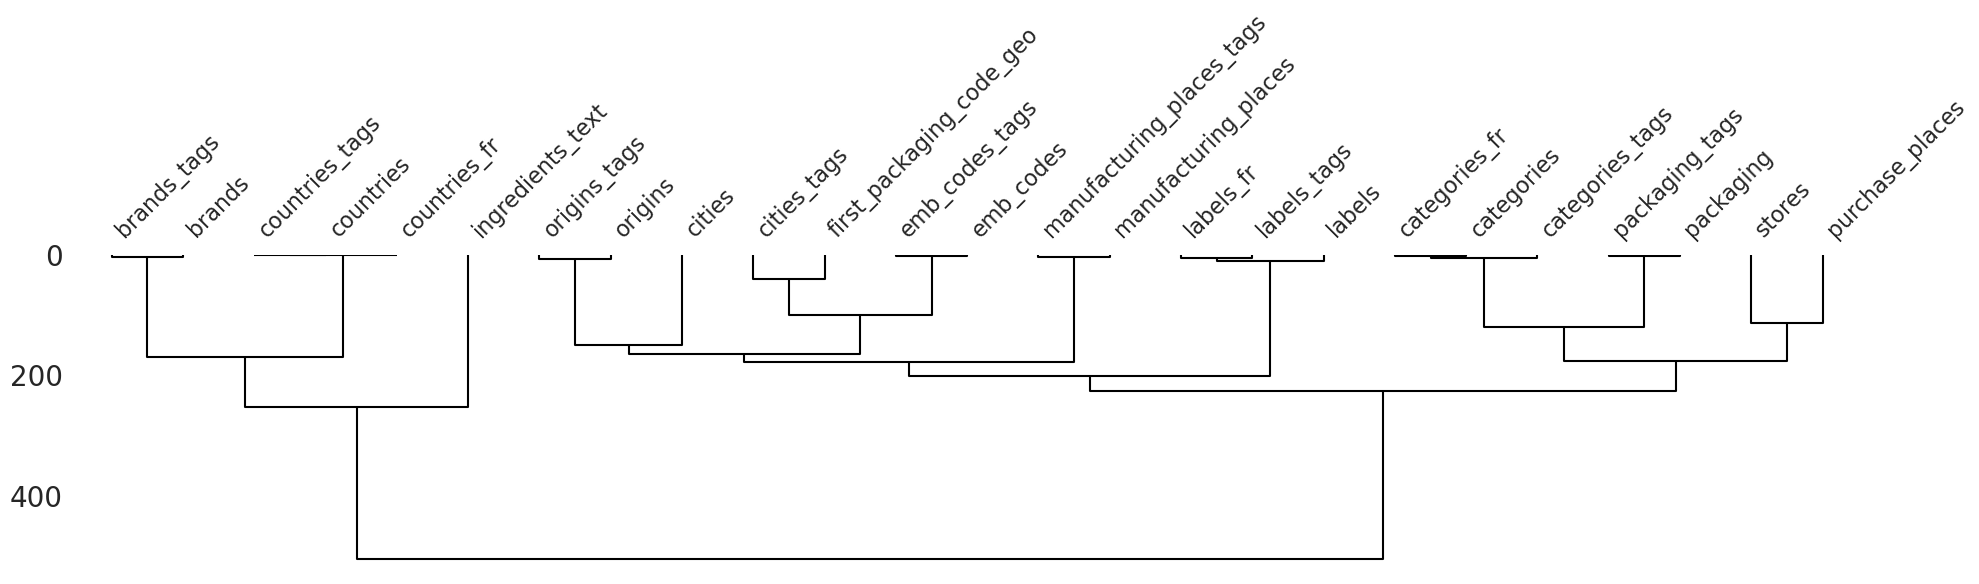

In [11]:
msno.dendrogram(df_tags, figsize=(20, 6))
plt.tight_layout()
plt.show()

In [12]:
df_ingredients.sample(10)

,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size
140876,"Yucca, combination of palm olein and palm oil,...",NaN,NaN,NaN,NaN,NaN,14 g (18 PIECES)
232199,"Pomme, framboise 9 %.",NaN,NaN,NaN,NaN,NaN,NaN
131012,"Cashews, vegetable oil (may contain one or mor...",NaN,NaN,NaN,NaN,NaN,30 g (19 PIECES)
226829,"Farine d'_épeautre_ T110 (76 %), farine de qui...","épeautre, orge",NaN,Sésame,en:sesame-seeds,Graines de sésame,NaN
240907,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82298,"Tomatoes, onions, serrano peppers, iodized sal...",NaN,NaN,NaN,NaN,NaN,31 g (2 Tbsp)
30021,"Filtered water, organic potatoes, organic leek...",NaN,NaN,NaN,NaN,NaN,240 g (1 cup)
27249,"Organic whole wheat flour, water, organic crac...",NaN,NaN,NaN,NaN,NaN,43 g (1.5 oz)
68206,NaN,NaN,NaN,"Nuts,Peanuts","en:nuts,en:peanuts","Fruits à coque,Arachides",1/2 bar (45 g)
264018,NaN,NaN,NaN,NaN,NaN,NaN,NaN


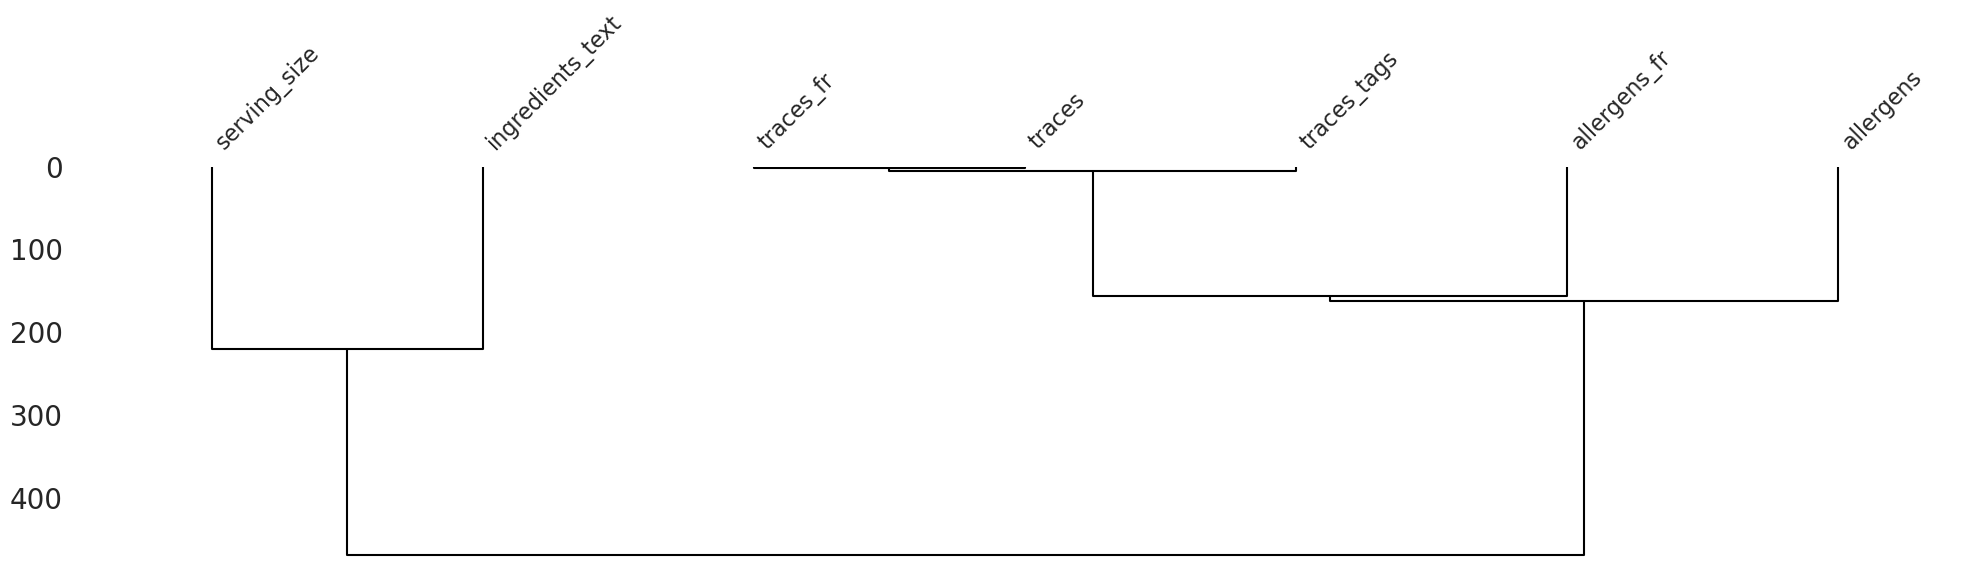

In [13]:
msno.dendrogram(df_ingredients, figsize=(20, 6))
plt.tight_layout()
plt.show()

In [14]:
df_misc.sample(10)

,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,...,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g
162725,28 g (1 ONZ),NaN,0.0,[ raw-whole-milk -> en:raw-whole-milk ] [ w...,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,1941.0
120126,3.125 g (3.125 g),NaN,0.0,[ select-blended-teas -> en:select-blended-te...,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,0.0
45724,61 g (0.25 cup),NaN,1.0,[ water -> en:water ] [ tomato-paste -> en:...,en:e508,E508 - Chlorure de potassium,0.0,NaN,NaN,0.0,...,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,105.0
260295,44 g (0.25 PIECE),NaN,1.0,[ sugar -> en:sugar ] [ cocoa-butter -> en:...,en:e322,E322 - Lécithines,0.0,NaN,NaN,0.0,...,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,NaN
111455,12 fl oz (355 mL),NaN,3.0,[ carbonated-water -> en:carbonated-water ] ...,"en:e150a,en:e338,en:e330","E150a - Caramel E150a,E338 - Acide orthophosph...",0.0,NaN,NaN,0.0,...,Beverages,Sweetened beverages,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:sodas,Sodas,http://fr.openfoodfacts.org/images/products/01...,http://fr.openfoodfacts.org/images/products/01...,41.7
244868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Milk and dairy products,Milk and yogurt,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",en:stirred-yogurts,Yaourts brassés,http://fr.openfoodfacts.org/images/products/35...,http://fr.openfoodfacts.org/images/products/35...,142.0
287745,100 g,NaN,1.0,[ sucre -> fr:sucre ] [ beurre-de-cacao -> ...,en:e322,E322 - Lécithines,0.0,NaN,NaN,0.0,...,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,2262.0
239019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN
274481,35 g,NaN,0.0,[ noix-de-cajou-51 -> fr:noix-de-cajou-51 ] ...,NaN,NaN,0.0,NaN,NaN,0.0,...,unknown,unknown,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:sugary-snacks,Snacks sucrés,http://fr.openfoodfacts.org/images/products/50...,http://fr.openfoodfacts.org/images/products/50...,1725.0
29209,60 g (0.25 CUP (30G) WITHOUT SHELLS),NaN,0.0,[ pistachios -> en:pistachios ],NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,1184.0


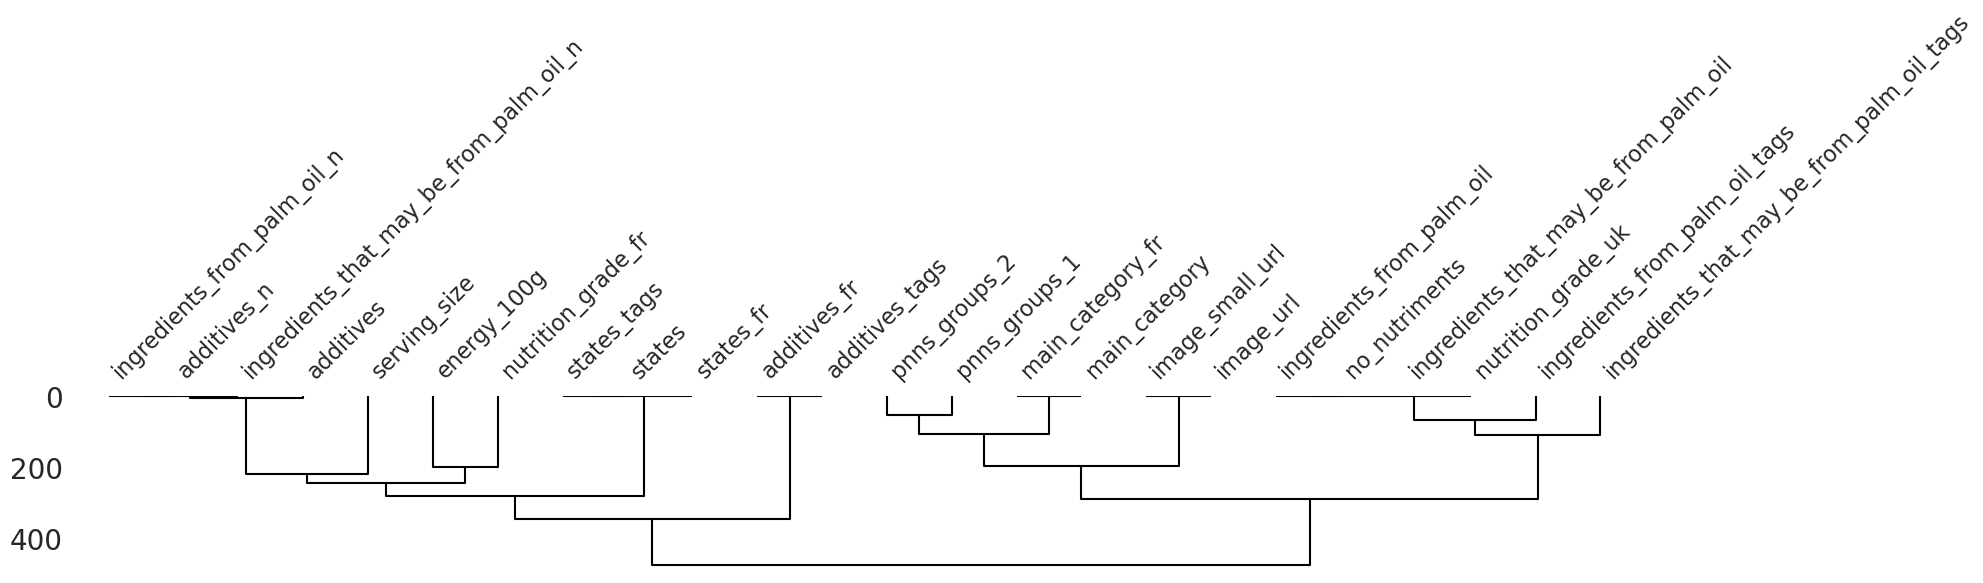

In [15]:
msno.dendrogram(df_misc, figsize=(20, 6))
plt.tight_layout()
plt.show()

## Definition of X and y

In [16]:
target = "main_category"

feats = [
    "creator",
    "ingredients_text",
    "countries_tags",
    "brands",
    "nutrition-score-uk_100g",
    "saturated-fat_100g",
    "sugars_100g",
    "proteins_100g",
    "salt_100g",
    "energy_100g",
]

In [80]:
from collections import Counter
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder

sns.set()

## Functions

In [119]:
def occurences(df, cats):
    fig = plt.figure(figsize=(6 * len(cats), 8))
    for i, cat in enumerate(cats):
        fig.add_subplot(1, len(cats), i + 1)

        outliers_1 = df[cat].value_counts() == 1
        outliers_2 = df[cat].value_counts() == 2
        non_outliers = ~(outliers_1 | outliers_2)

        labels = ['More than twice', "Twice", 'Once']
        sizes = [sum(non_outliers), sum(outliers_2), sum(outliers_1)]

        plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
        plt.title(f'Categories occurrence in "{cat}"')
    plt.tight_layout()
    plt.show()

In [145]:
def filter_top_labels(df, col, n):
    print(f'Top {n} {col}: {df[col].value_counts().nlargest(n).index.tolist()}')
    return df[df.isin(df[col].value_counts().nlargest(n).index)[col] == True]

## Classes

In [56]:
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, features=None, target=None):
        self.features = features
        self.target = target

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Drop rows with missing target values, select specified features and target, and drop duplicates
        X_selected = X.dropna(subset=self.target)[self.features].drop_duplicates(subset=self.features)
        return X_selected

In [61]:
class OutlierToNaN(BaseEstimator, TransformerMixin):
    def __init__(self, iqr=False):
        self.iqr = iqr
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        def bound_data(data):
            # Identify and filter out outliers based on the IQR method
            q1, q3 = np.percentile(data, [25, 75])
            lower_bound = 2.5 * q1 - 1.5 * q3
            upper_bound = 2.5 * q3 - 1.5 * q1
            return lower_bound, upper_bound
        
        if str(X.dtype).startswith('float'):
            X[X > 100] = np.nan
        if self.iqr:
            lower, upper = bound_data(X)
            X[X > upper | X < lower] = np.nan
        return X

In [22]:
class CatProbImputer(BaseEstimator, TransformerMixin):
    def __init__(self, n_cat):
        self.n_cat = n_cat

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Impute missing values using a random variable
        def random_imputing(row, choices, probs):
            if pd.isnull(row):
                return np.random.choice(choices, p=probs)
            else:
                return row

        # Calculate value counts of non-null values
        vc = X.dropna().value_counts()

        # Map top categories, treat others as 'other', and calculate normalized value counts
        top = X.map(
            {
                i: i if i in vc[: self.n_cat].index.tolist() else "misc"
                for i in vc.index.tolist()
            }
        )
        top_vc = top.value_counts(normalize=True)

        # Extract choices and corresponding probabilities
        self.choices = top_vc.index.tolist()
        self.probs = pd.to_numeric(top_vc.values, errors="coerce")

        # Apply the imputation function to the Series
        X_imputed = self.top.apply(
            random_imputing,
            args=(
                self.choices,
                self.probs,
            ),
        )
        return X_imputed

In [23]:
class LabelFormatter(BaseEstimator, TransformerMixin):

    def __init__(self, to_format=None):
        self.to_format = to_format

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Filter and extract nouns from a given sentence.
        def filter_tokens(sentence):
            if pd.notna(sentence):
                tokens = word_tokenize(sentence.lower())
                words = {
                    word for word in tokens
                    # Extract nouns that do not contain specific characters
                    if all(char not in word for char in "%'/:")
                    and len(word) > 2
                }
                return words
            else:
                return np.nan

        # Apply the filter_tokens function to extract and filter nouns from sentences
        if isinstance(X, pd.DataFrame):
            formatted_col = X[self.to_format].apply(filter_tokens)
            X.loc[:, self.to_format] = formatted_col
        else:
            X = pd.DataFrame(X.apply(filter_tokens))
       
        return X

In [24]:
class MultiLabelEncoder(BaseEstimator, TransformerMixin):

    def __init__(self, to_encode=None, rank=None):
        self.to_encode = to_encode
        self.rank = rank

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Function to filter words in a list based on a checklist
        def filter_words(lst, checklist):
            if pd.notna(lst):
                # Keep only words that are in the checklist
                words = {word for word in lst if word in checklist}
                return words
            else:
                return np.nan

        encoded_col = X[self.to_encode]
        # Count the occurrences of each word in the dataset
        count = Counter(
            [
                word
                for rows in encoded_col.dropna()
                for word in rows
                if word == word and "and" not in word
            ]
        )

        # Extract the most common words and their counts up to the specified rank
        self.most_common = pd.Series(
            [i[1] for i in count.most_common(self.rank)],
            index=[j[0] for j in count.most_common(self.rank)],
        )

        # Apply the filter_words function to keep only the most common words in each row
        encoded_col = encoded_col.apply(filter_words, args=(self.most_common.index,))

        # Initialize MultiLabelBinarizer and fit it with the most common words
        mlb = MultiLabelBinarizer()
        mlb.fit([self.most_common.index])

        # Transform the filtered words into binary representation
        encoded_values = mlb.transform(encoded_col.dropna()).tolist()

        # Apply the transformation to replace words with their binary representation
        encoded_col = encoded_col.apply(
            lambda x: encoded_values.pop(0) if pd.notna(x) else np.full(self.rank, np.nan)
        )

        X.loc[:, self.to_encode] = encoded_col
        return X

In [25]:
class LabelImputer(BaseEstimator, TransformerMixin):
    def __init__(self, to_impute=None):
        self.to_impute = to_impute

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        knn = KNNImputer(n_neighbors=10)
        imputed_col = knn.fit(X[self.to_impute])
        X.loc[:, self.target] = imputed_col
        return X

## EDA

In [67]:
fs = FeatureSelector(features=feats, target=target)
otn = OutlierToNaN()

selected_data = fs.fit_transform(df)

for c in selected_data.columns:
    otn = OutlierToNaN()
    selected_data.loc[:, c] = otn.fit_transform(selected_data[c])

In [27]:
fmt = LabelFormatter()
y_ = fmt.fit_transform(df[target].dropna())[target].explode()

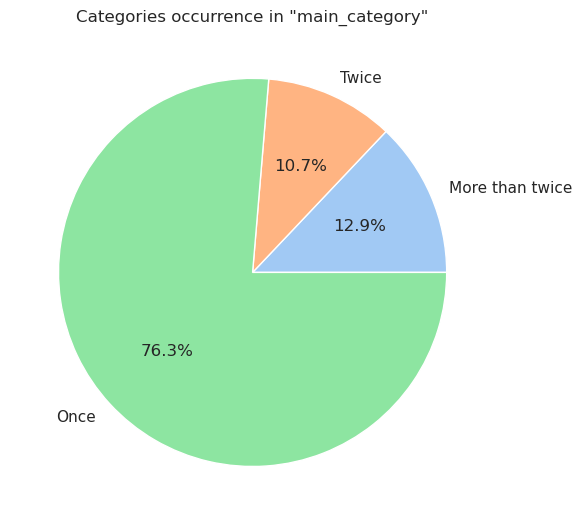

In [28]:
occurences(pd.DataFrame(y_), [target])

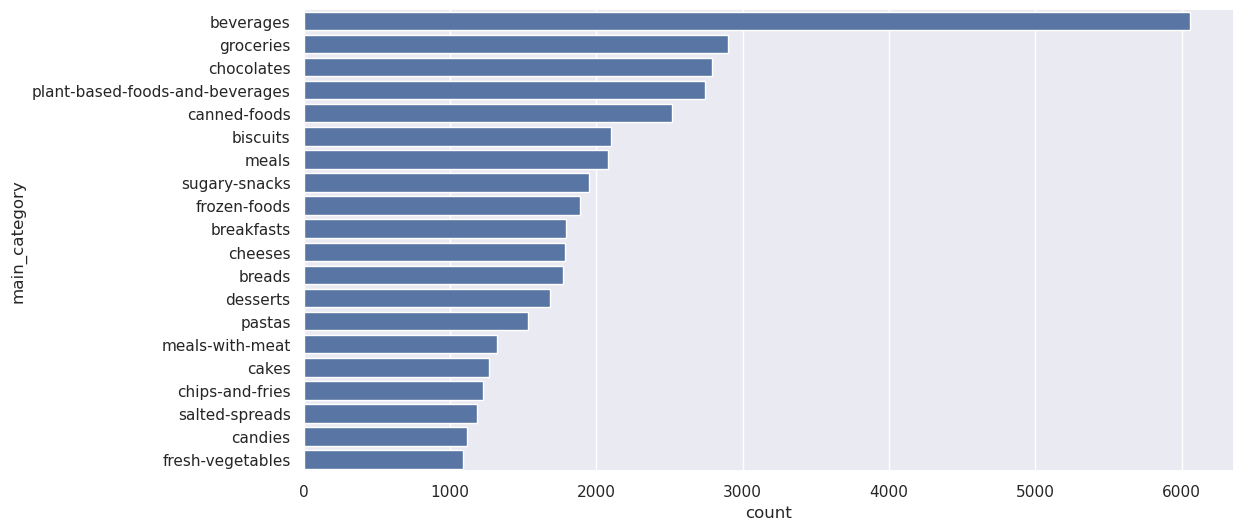

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(
    y=y_,
    order=y_.value_counts()[:20].index,
    color='b'
)
plt.show()

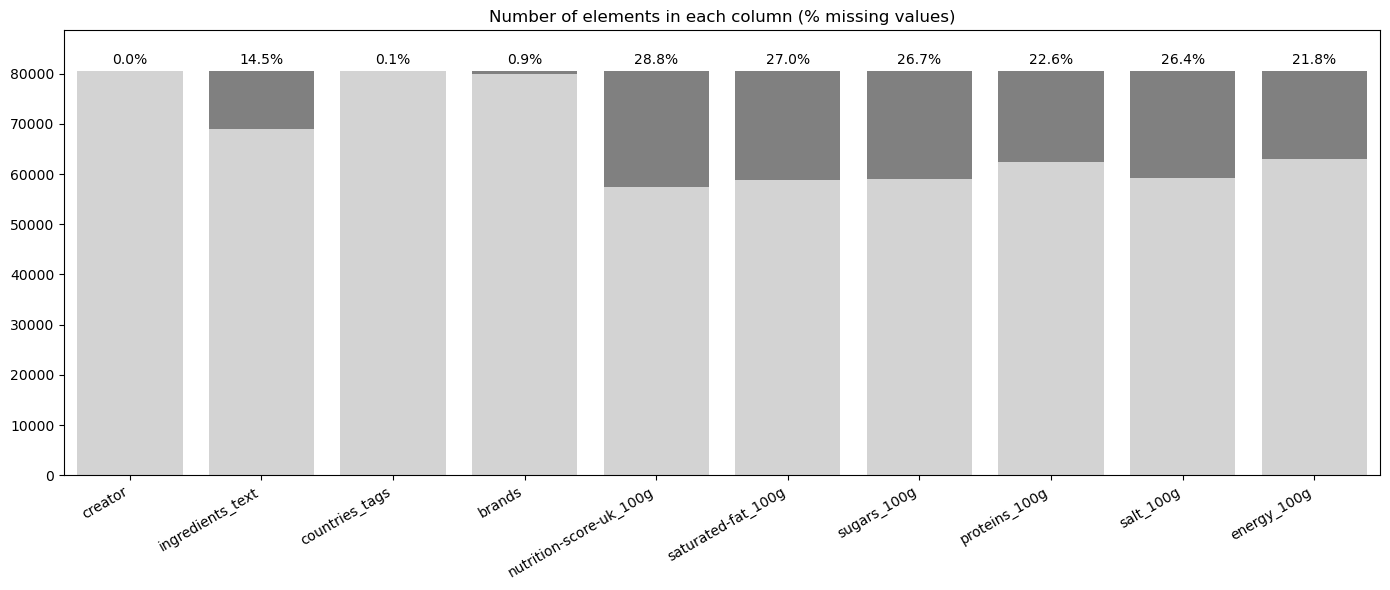

In [59]:
sns.reset_orig()
plt.figure(figsize=(14, 6))
missing_val_number = lambda series: len(series.index) - series.count()

bar_total = sns.barplot(
    x=selected_data.count().index, y=[len(selected_data)] * len(selected_data.count()), color="gray"
)
bar_elements = sns.barplot(
    x=selected_data.count().index, y=selected_data.count().values, color="lightgray"
)

for i, col in enumerate(selected_data.columns):
    bar_total.text(
        i,
        1.01 * len(selected_data),
        f"{round(missing_val_number(selected_data[col]) / len(selected_data) * 100, 1)}%",
        ha="center",
        va="bottom",
        color="black",
    )

bar_total.set_ylim(0, 1.1 * len(selected_data))

plt.xticks(rotation=30, ha="right")
plt.title("Number of elements in each column (% missing values)")
plt.tight_layout()
plt.show()
sns.set()

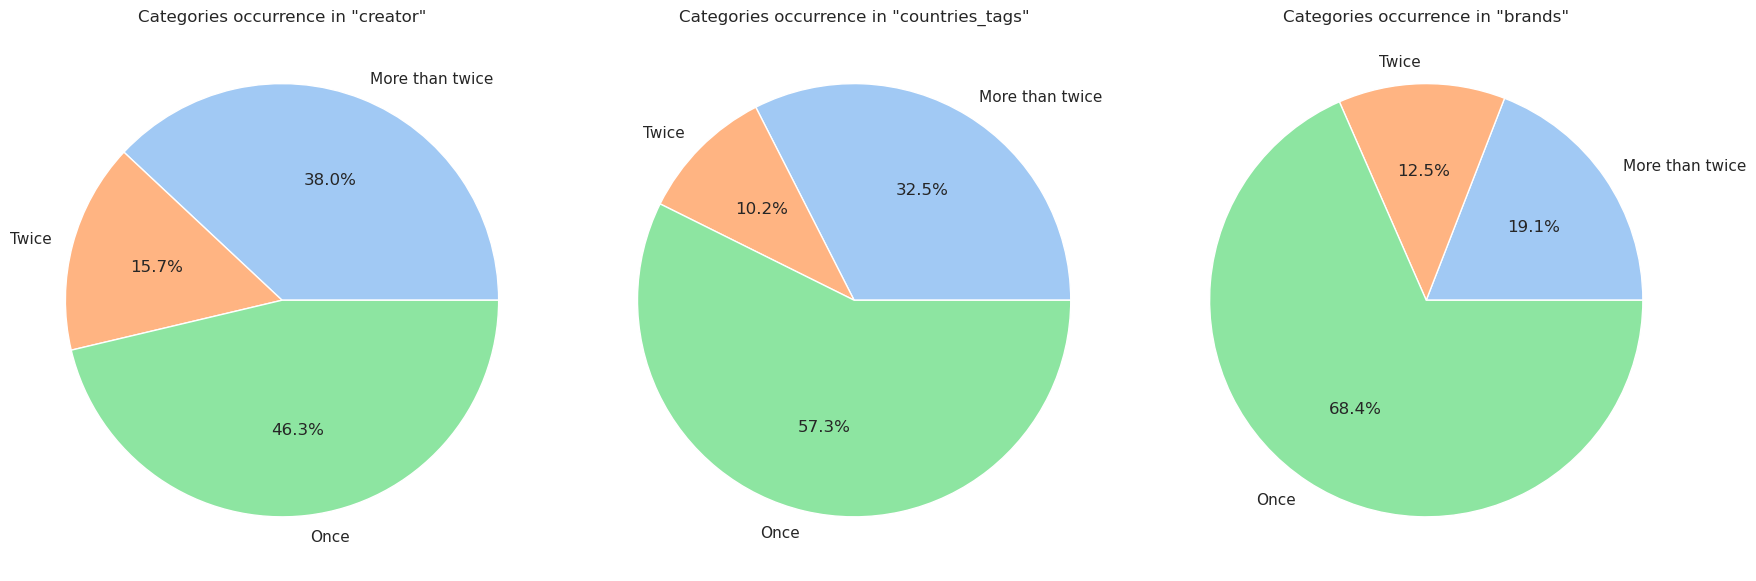

In [31]:
list_cat = ['creator', 'countries_tags', 'brands']

occurences(selected_data, list_cat)

In [165]:
numerical_feats = ["sugars_100g", "saturated-fat_100g", "proteins_100g", "salt_100g"]

numerical_data_100g = {
    label: selected_data[label][
        ~selected_data[label].isna()
        & (selected_data[label] < 100)
        & (selected_data[label] > 0)
    ] 
    for label in numerical_feats
}

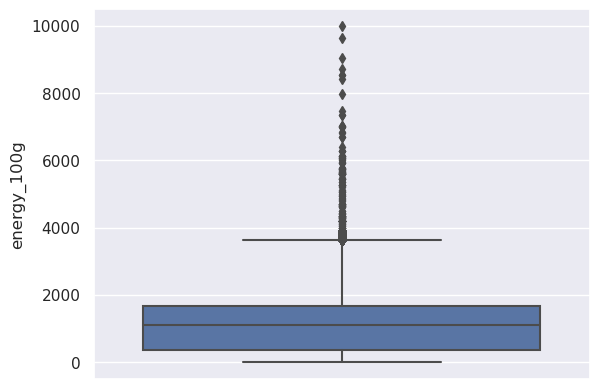

In [32]:
sns.boxplot(
    y=df["energy_100g"][~df_nutrition["energy_100g"].isna()][
        df["energy_100g"] < 10000
    ]
)
plt.show()

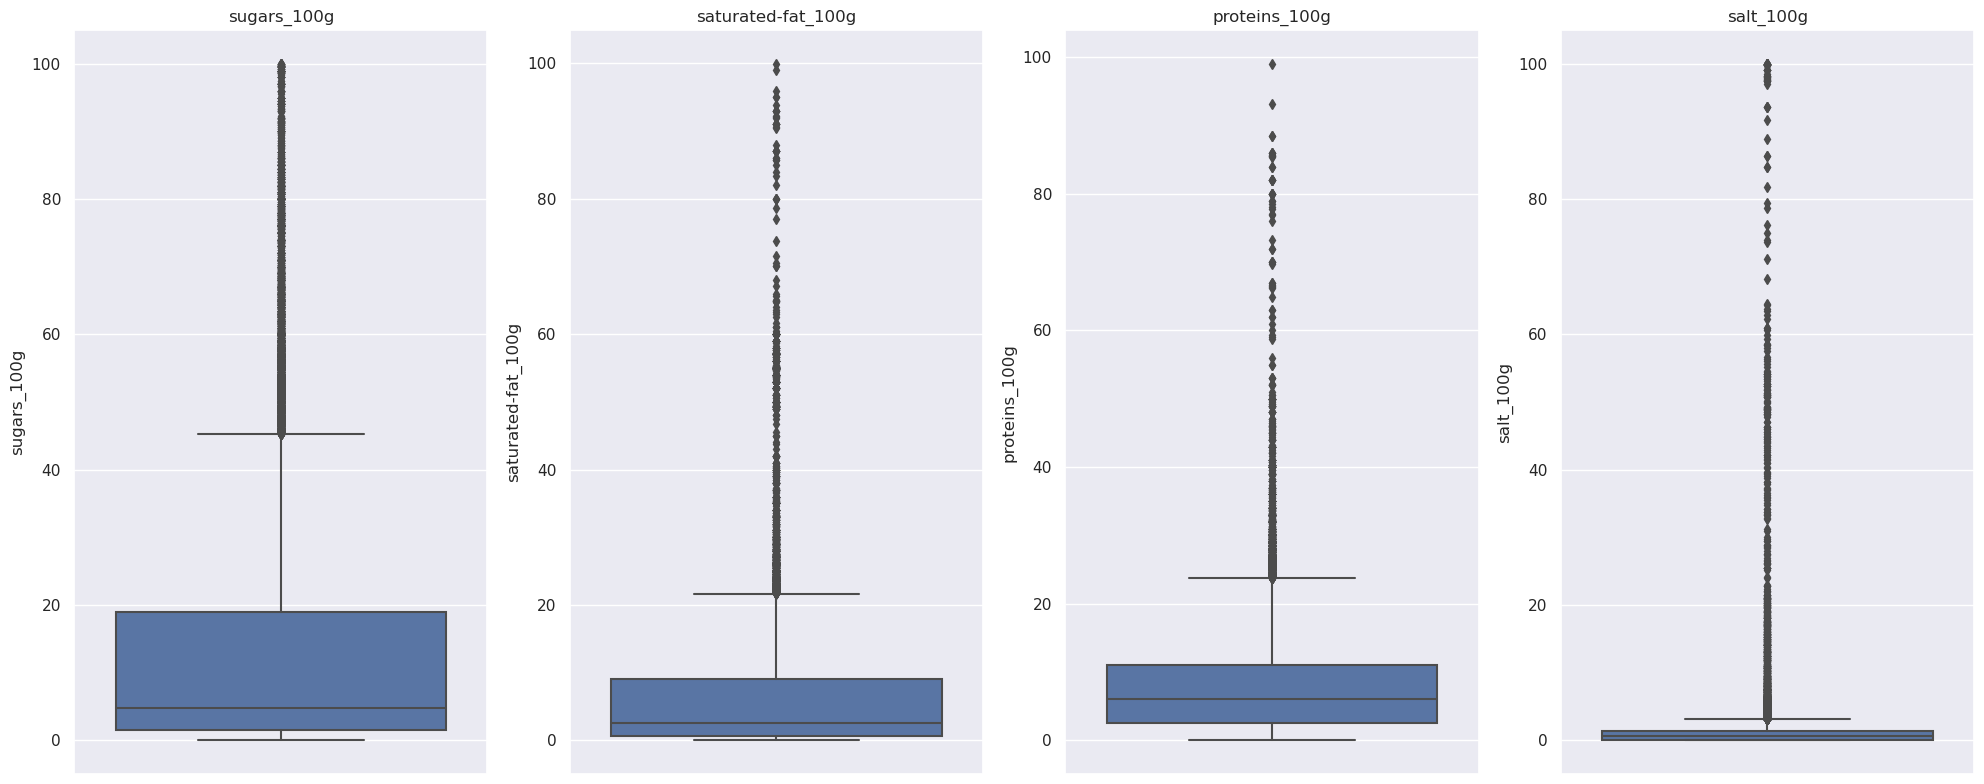

In [166]:
fig = plt.figure(figsize=(20, 8))

for i, label in enumerate(numerical_data_100g):
    fig.add_subplot(1, 4, i + 1)
    sns.boxplot(y=numerical_data_100g[label])
    plt.title(label)
plt.tight_layout()
plt.show()

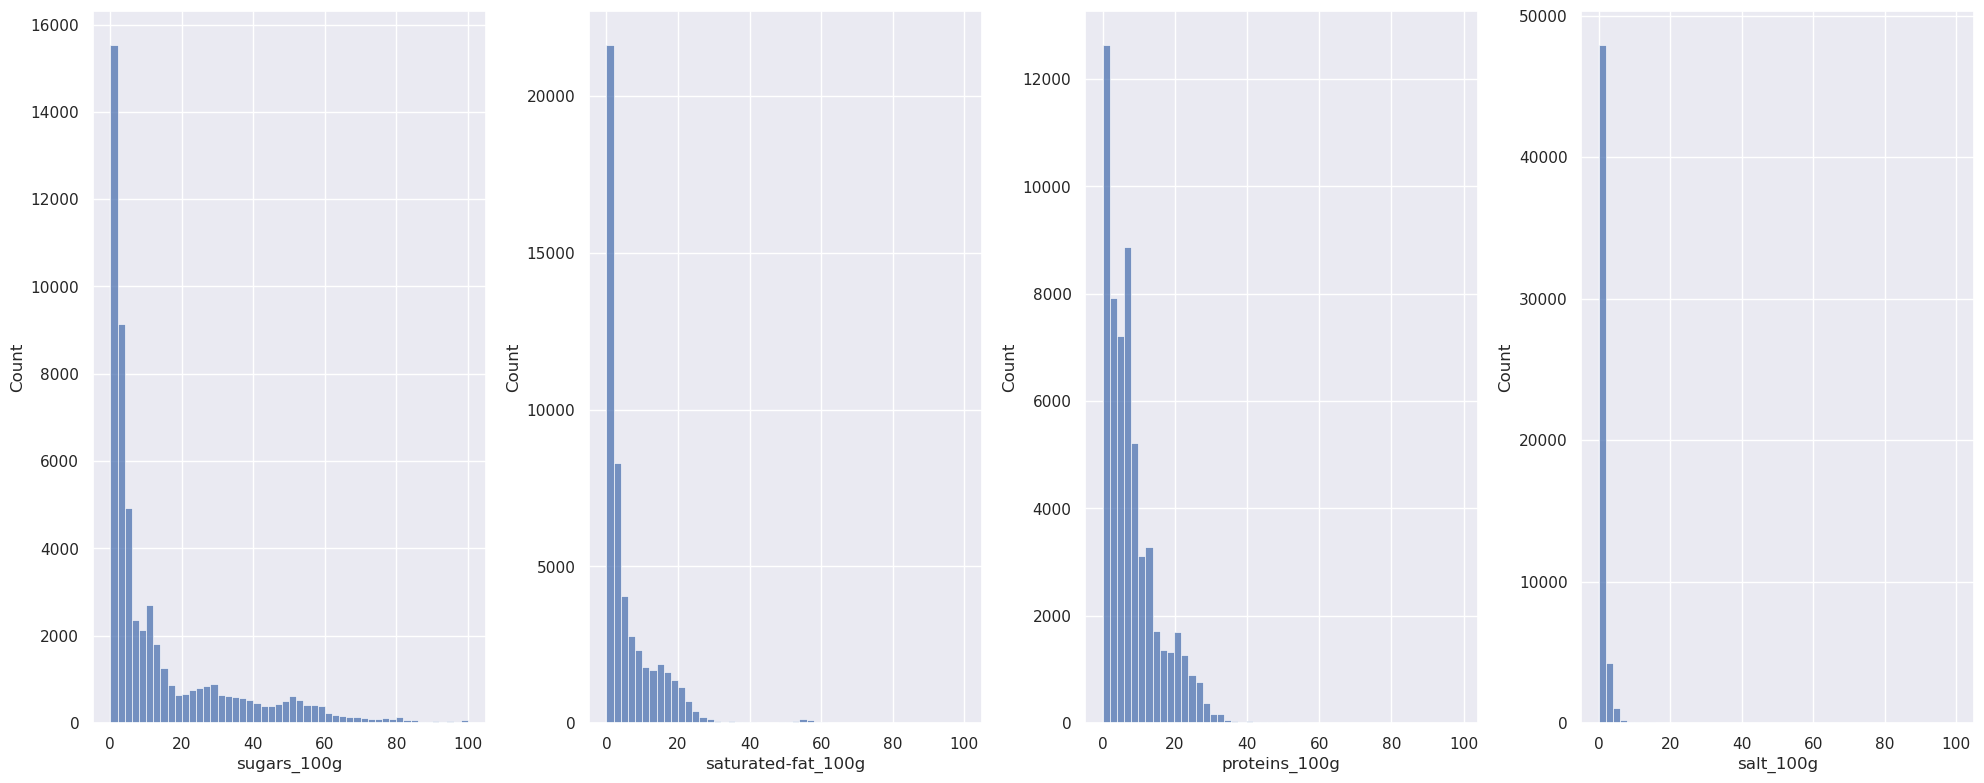

In [167]:
fig = plt.figure(figsize=(20, 8))

data_orig = []

for i, label in enumerate(numerical_data_100g):
    fig.add_subplot(1, len(numerical_feats), i + 1)
    sns.histplot(numerical_data_100g[label], bins=50)
plt.tight_layout()
plt.show()

In [35]:
from scipy.stats import norm
from sklearn.preprocessing import scale
from scipy.stats import probplot

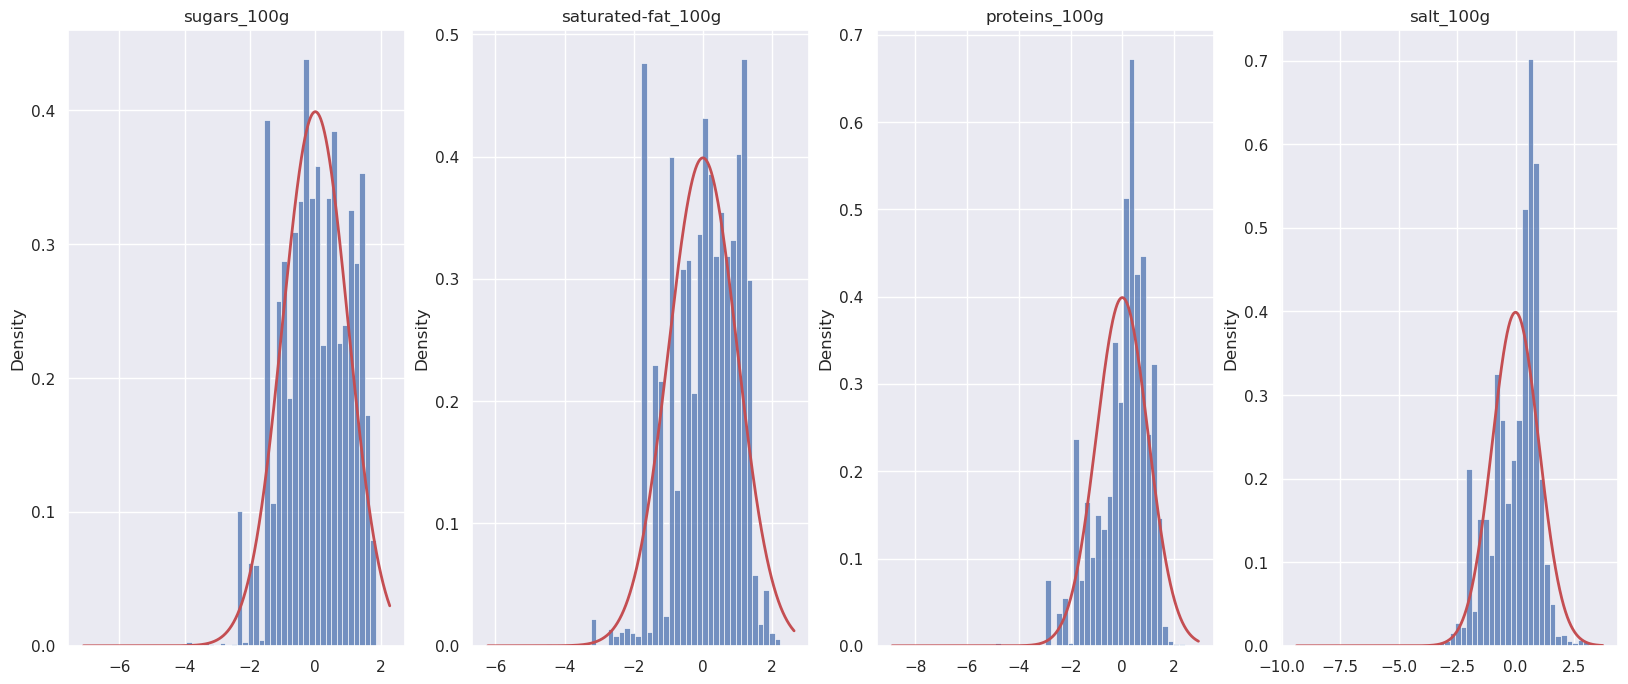

In [171]:
sns.set()
fig = plt.figure(figsize=(20, 8))

stats = []
for i, label in enumerate(numerical_data_100g):
    fig.add_subplot(1, len(numerical_feats), i + 1)
    standardized_data = scale(numerical_data_100g[label].apply(np.log))
    sns.histplot(standardized_data, bins=50, stat="density")

    xmin, xmax = plt.xlim()
    x_values = np.linspace(xmin, xmax, 100000)
    mu, std = norm.fit(standardized_data)
    n_prob = norm.pdf(x_values, mu, std)
    stats.append((label, standardized_data, mu, std))

    plt.plot(x_values, n_prob, "r", linewidth=2)
    plt.title(label)
plt.show()

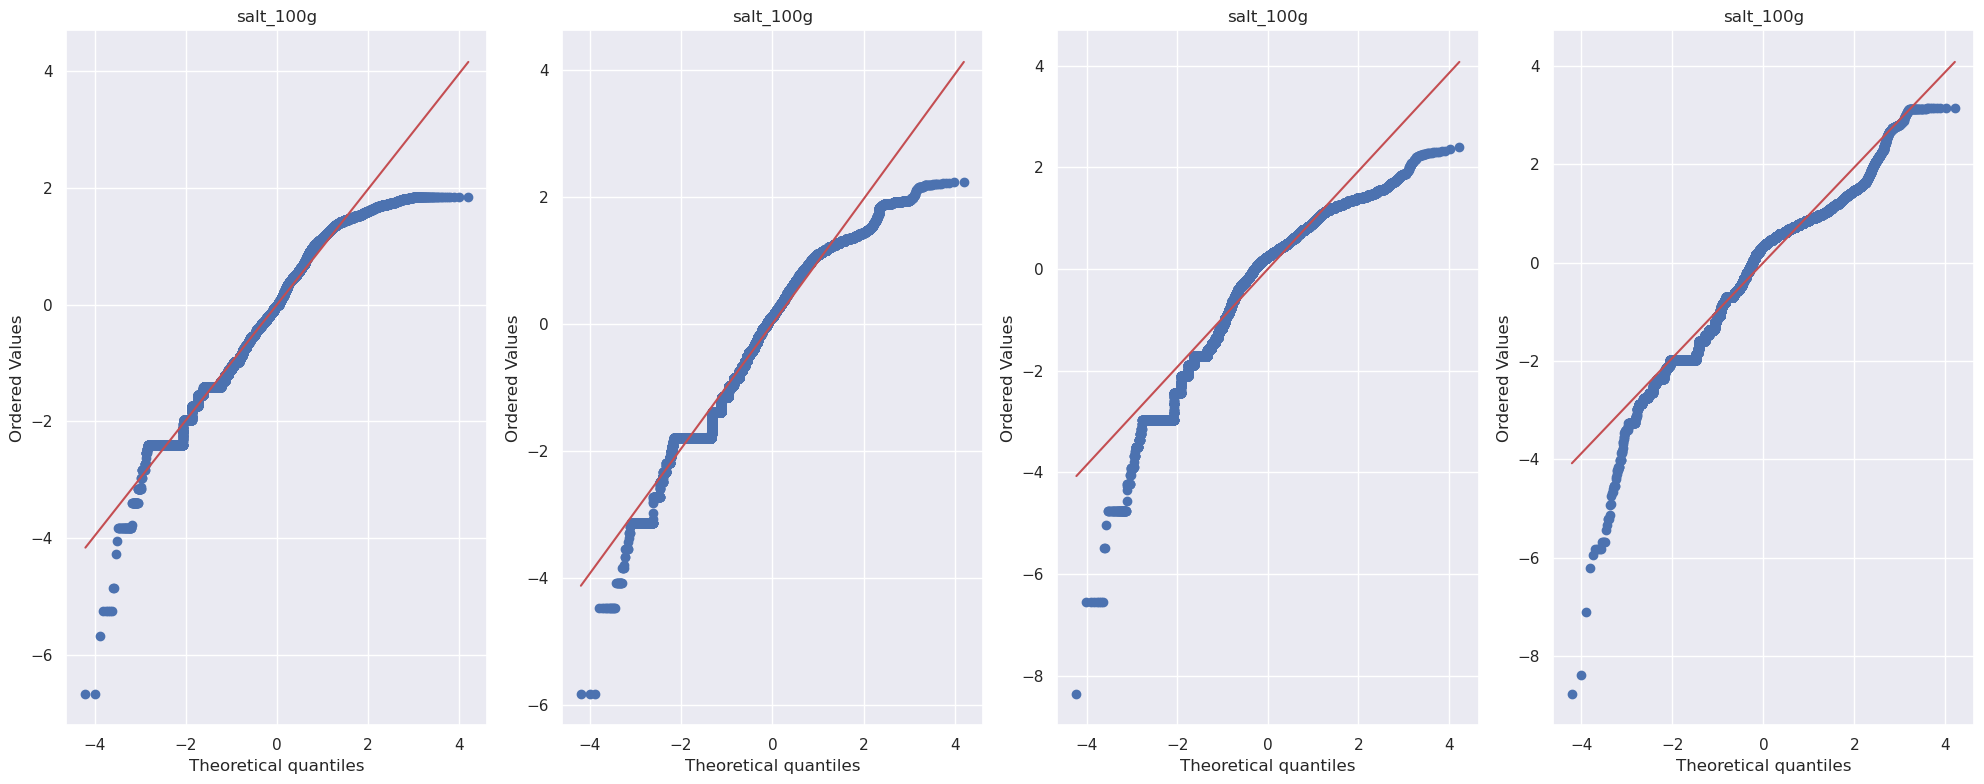

In [170]:
fig, axes = plt.subplots(1, 4, figsize=(20, 8))

for i, standardized_data in enumerate([s[1] for s in stats]):
    ax = axes[i]
    probplot(standardized_data, dist="norm", plot=ax)
    ax.set_title(label)

plt.tight_layout()
plt.show()

<Figure size 2000x800 with 0 Axes>

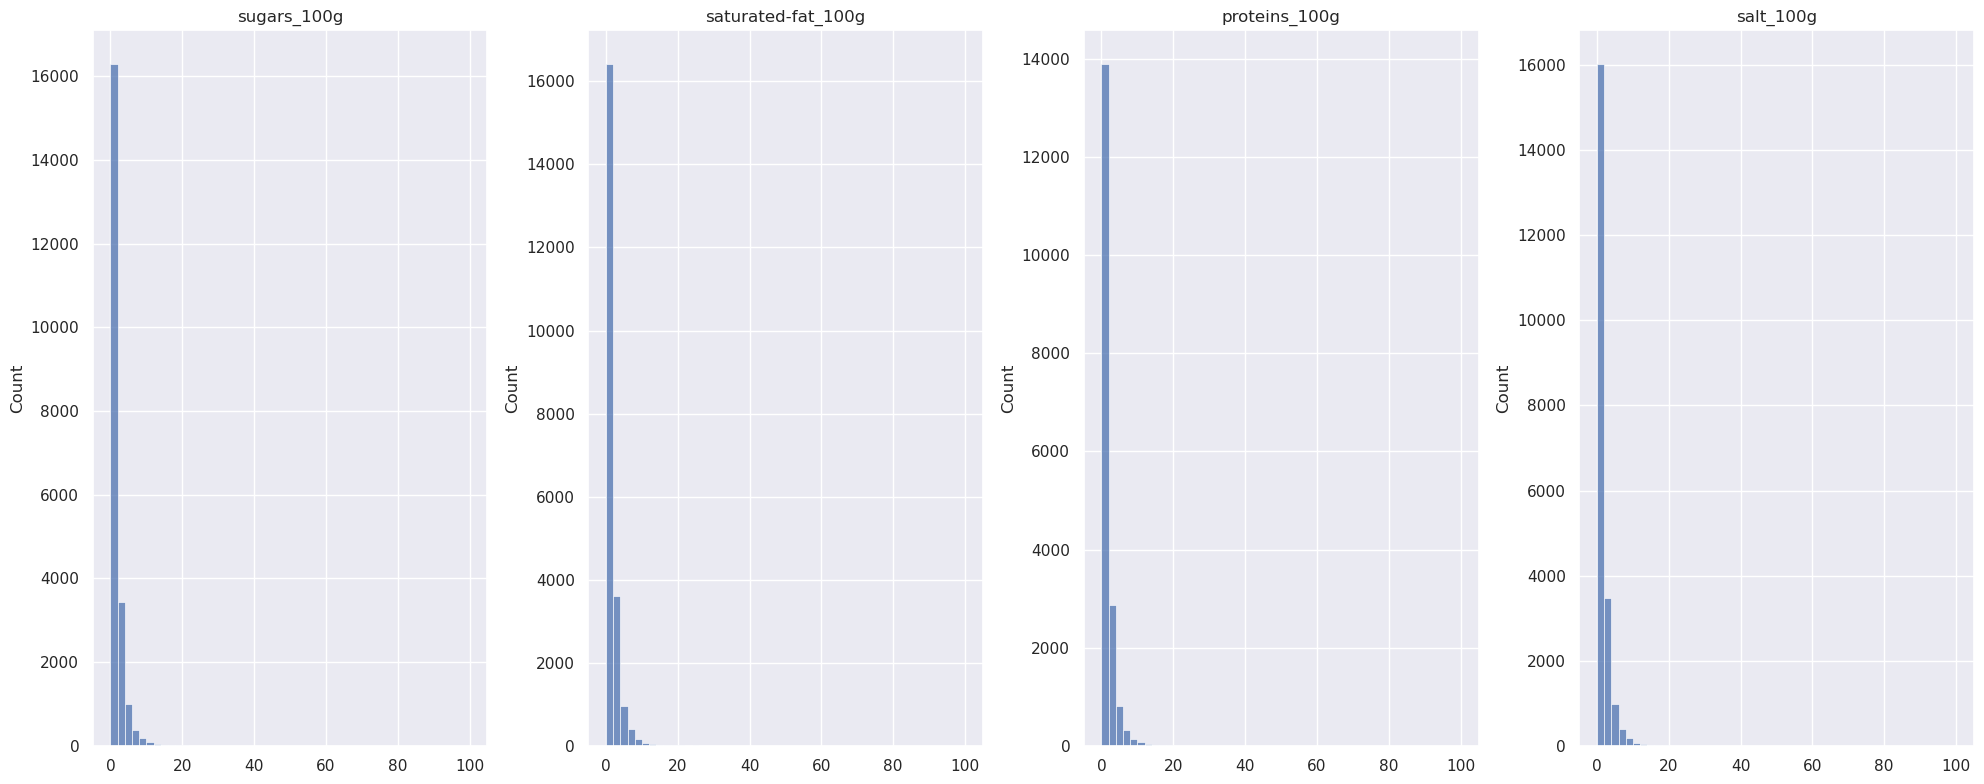

In [151]:
fig = plt.figure(figsize=(20, 8))

imputed_data = {}

for i, (label, standardized_data, mu, std) in enumerate(stats):
    fig.add_subplot(1, 4, i + 1)
    n_missing_vals = missing_val_number(selected_data[label])
    reverse_transform = np.exp((norm.rvs(mu, std, size=n_missing_vals)) * std) + mu
    imputed_data[label] = reverse_transform
    sns.histplot(reverse_transform, bins=50, binrange=[0,100])
    plt.title(label)
plt.tight_layout()
plt.show()

In [153]:
for label in imputed_data.keys():
    imputed_df = selected_data[label].fillna(imputed_data[label])
    sns.histplot()
    

0        1.035476
1        1.484325
2        0.315413
3        4.306665
4        2.399279
           ...   
21522    0.178524
21523    1.252449
21524    0.628015
21525    1.393773
21526    0.467782
Length: 21527, dtype: float64
0        1.869259
1        1.451235
2        0.390387
3        2.747903
4        1.856943
           ...   
21742    0.282686
21743    1.669380
21744    0.523009
21745    1.178790
21746    0.444845
Length: 21747, dtype: float64
0        0.427811
1        2.835525
2        7.201125
3        3.738184
4        0.770333
           ...   
18206    1.287999
18207    2.320090
18208    1.026925
18209    0.619282
18210    0.333935
Length: 18211, dtype: float64
0        3.659218
1        0.967731
2        0.463126
3        0.598795
4        1.827700
           ...   
21267    4.377621
21268    1.188949
21269    1.226022
21270    1.772537
21271    1.457966
Length: 21272, dtype: float64


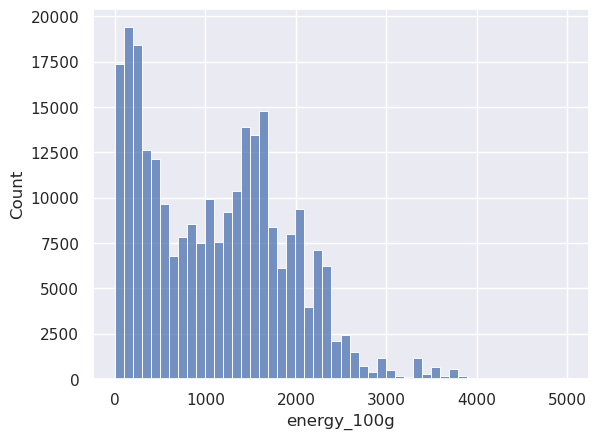

In [39]:
sns.histplot(
    df_nutrition["energy_100g"][~df_nutrition["energy_100g"].isna()][
        df_nutrition["energy_100g"] < 5000
    ],
    bins=50,
)

plt.show()

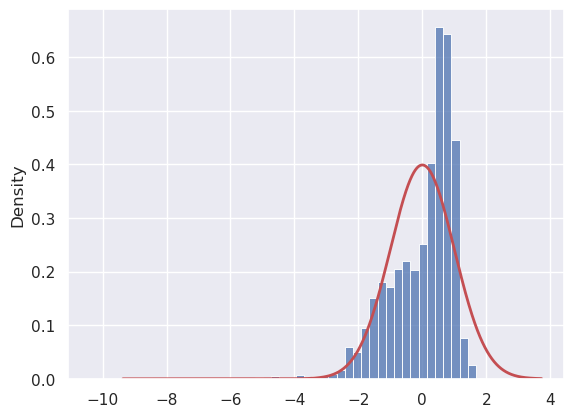

In [172]:
std_data = scale(
    df_nutrition["energy_100g"][~df_nutrition["energy_100g"].isna()][
        df_nutrition["energy_100g"] < 10000
    ][df_nutrition["energy_100g"] > 0].apply(np.log)
)

sns.histplot(std_data, stat="density", bins=50)

mu, std = norm.fit(std_data)

x = np.linspace(xmin, xmax, 100000)
n = norm.pdf(x, mu, std)

plt.plot(x, n, "r", linewidth=2)
plt.show()

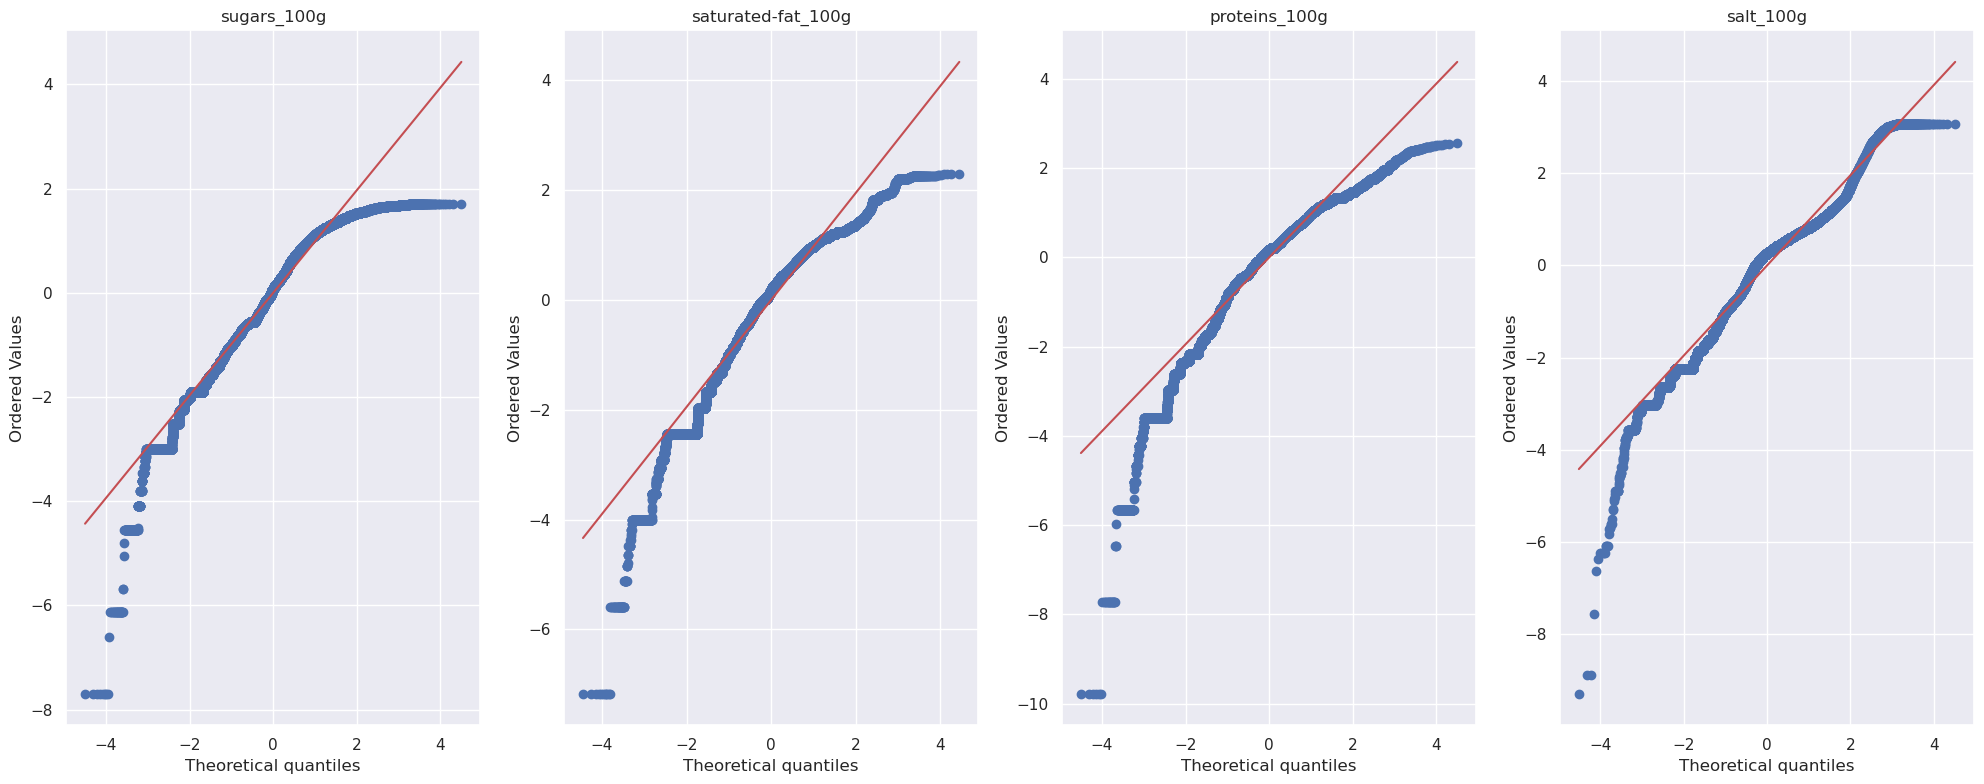

In [41]:
fig, axes = plt.subplots(1, 4, figsize=(20, 8))

for i, (label, standardized_data, mu, std) in enumerate(stats):
    ax = axes[i]
    probplot(standardized_data, dist="norm", plot=ax)
    ax.set_title(label)

plt.tight_layout()
plt.show()

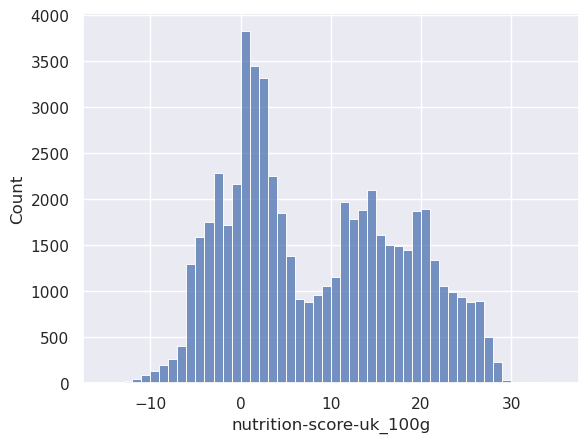

In [42]:
sns.histplot(selected_data['nutrition-score-uk_100g'], bins=50)
plt.show()

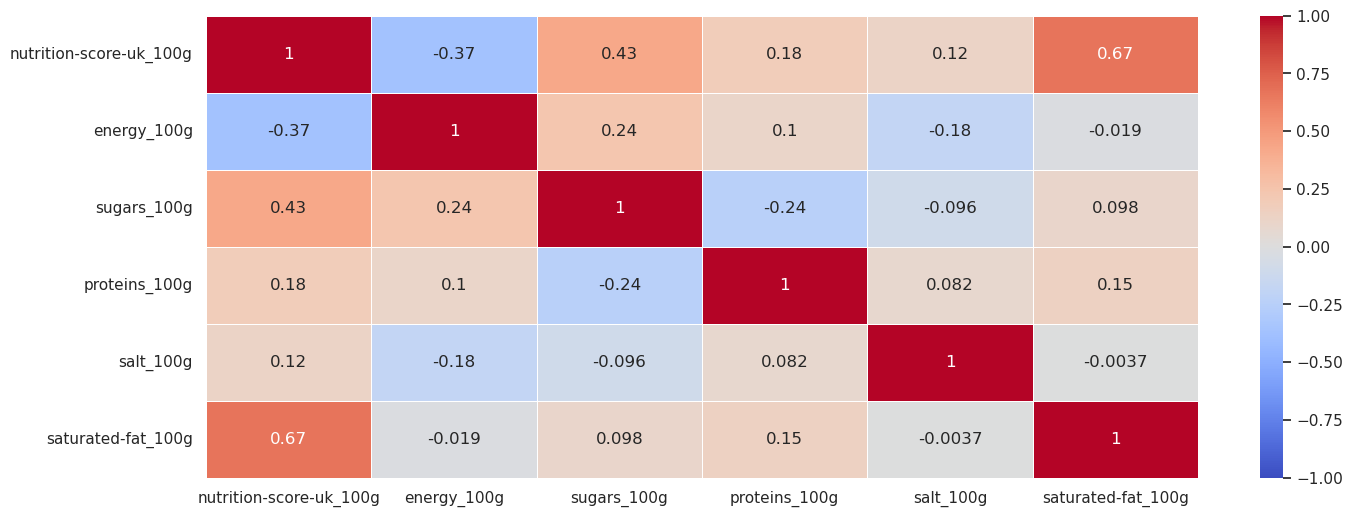

In [81]:
cm = selected_data[[
    "nutrition-score-uk_100g",
    "energy_100g",
    "sugars_100g",
    "proteins_100g",
    "salt_100g",
    "saturated-fat_100g",
    ]].corr()

fig = plt.figure(figsize=(16, 6))

sns.heatmap(cm, linewidths=0.5, cmap="coolwarm", vmin=-1, annot=True)

plt.show()

In [148]:
fig = plt.figure(figsize=(20, 8))

cols = [
    "energy_100g",
    "sugars_100g",
    "proteins_100g",
    "salt_100g",
    "saturated-fat_100g",
]

scaled_data = pd.DataFrame(scale(selected_data[cols]), columns=cols)

pca = PCA()
results = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame({'Principal Components': ['PC' + str(x) for x in range(1, len(pca.explained_variance_ratio_) + 1)],
                       'Explained Variance': pca.explained_variance_ratio_})


fig.add_subplot(121)
sns.barplot(data=pca_df, x='Principal Components', y='Explained Variance')

fig.add_subplot(122)
sns.scatterplot(x=results[:, 0], y=results[:, 1])

plt.show()

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [116]:
pd.Series(pca.components_[0], index=scaled_data.columns).abs().sort_values(ascending=False)

proteins_100g         0.699759
saturated-fat_100g    0.673707
energy_100g           0.195055
sugars_100g           0.124854
salt_100g             0.053125
dtype: float64

In [117]:
pd.Series(pca.components_[1], index=scaled_data.columns).abs().sort_values(ascending=False)

energy_100g           0.643824
salt_100g             0.535911
sugars_100g           0.488241
saturated-fat_100g    0.228786
proteins_100g         0.086996
dtype: float64

In [147]:
filter_top_labels(selected_data, 'creator', 3)

Top 3 creator: ['openfoodfacts-contributors', 'tacite', 'sebleouf']


,creator,ingredients_text,countries_tags,brands,nutrition-score-uk_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,energy_100g
184,openfoodfacts-contributors,"Sucre, farine de _Blé_, graisse et huiles végé...",en:france,St Michel,NaN,NaN,NaN,NaN,NaN,NaN
186,openfoodfacts-contributors,NaN,en:canada,Kirkland Signature,NaN,NaN,NaN,33.900,0.735,NaN
187,tacite,NaN,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,sebleouf,"Thé noir de Chine, zestes d'oranges 7,5 %, arô...",en:france,Alice Délice,NaN,NaN,NaN,NaN,NaN,NaN
189,sebleouf,"Sirop saveur pistache 5 cl : sirop 99,16 % (su...",en:france,Alice Délice,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
320702,sebleouf,"Édulcorants : sorbitols, sucralose, acésulfame...",en:france,Fisherman's Friend,2.0,1.28,0.1,0.004,0.001,NaN
320705,openfoodfacts-contributors,NaN,en:france,"Nestlé,Nestlé Dessert",NaN,NaN,NaN,NaN,NaN,NaN
320708,openfoodfacts-contributors,"Purified water, potassium bicarbonate, sodium ...",en:united-states,KIRKLAND,NaN,NaN,NaN,NaN,NaN,NaN
320759,openfoodfacts-contributors,NaN,en:russia,Пеликан,NaN,NaN,NaN,NaN,NaN,NaN
